In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skew, norm

## Exporting the processed train and test datasets

In [2]:
train = pd.read_csv(r"E:\processed_train.csv")
test = pd.read_csv(r"E:\processed_test.csv")

## Separating Target and Predictor Variables

In [3]:
target = train["SalePrice"]

In [4]:
target.shape

(1460,)

In [5]:
predictor = train.drop(columns=["SalePrice"])

In [6]:
predictor.shape

(1460, 295)

In [7]:
# Basic Regressors from Sklearn.
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score

In [8]:
# Advanced Regressors.
import shap
from xgboost import XGBRegressor
from catboost import Pool
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor

In [9]:
import time

## Creating RMSE Metric and Setting K Folds for Cross Validation

In [10]:
def cv_rmse(model):
    return np.sqrt(-cross_val_score(model, predictor, target, scoring="neg_mean_squared_error", cv=kf))

In [11]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_scores, cv_std = [], []

## Decision Tree Regressor

In [12]:
dt_model = DecisionTreeRegressor()  
dt_model.fit(predictor, target)
target_pred = dt_model.predict(predictor)
MSE_train = np.mean((target_pred - target)**2)

print(f"Mean Squared Error = {MSE_train}\n")
print(f"RMSE score: {cv_rmse(dt_model)}\n")
print(f"Cross Validation Score: {cv_rmse(dt_model).mean()}\n")
print(f"R2 Score: {r2_score(target, target_pred)}")

Mean Squared Error = 6.483788262090507e-33

RMSE score: [0.19267243 0.18844557 0.14573209 0.20168739 0.21379976 0.23927175
 0.23008023 0.16486419 0.22167906 0.17341299]

Cross Validation Score: 0.19963070452052542

R2 Score: 1.0


In [13]:
# Visualizing the model.

Text(0.5, 1.0, 'Prices vs. Predicted Prices')

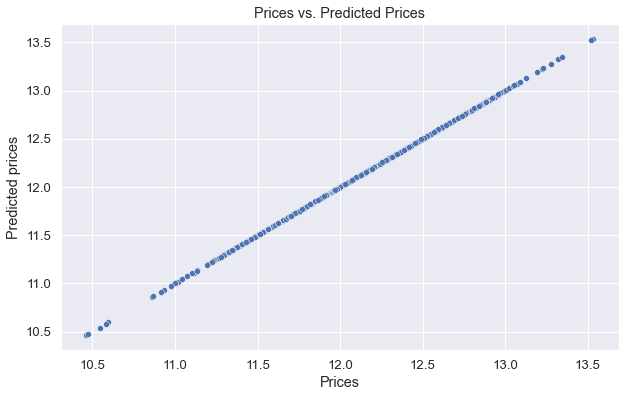

In [14]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.scatterplot(x=target, y=target_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

Text(0, 0.5, 'Residuals')

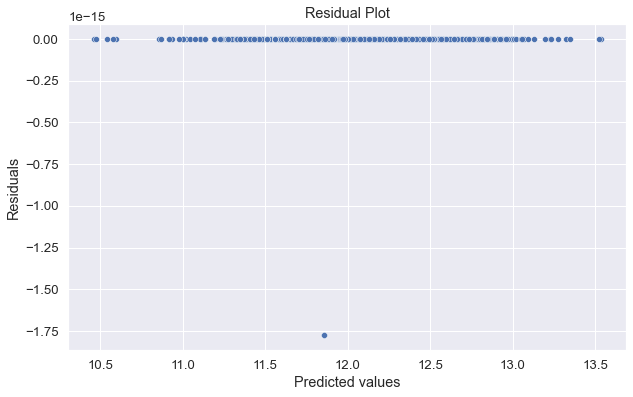

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=target_pred, y=target_pred - target)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

## Random Forest Regressor

In [16]:
# Hyperparameters tuning.

In [ ]:
t0 = time.time()

rfr = RandomForestRegressor()

rfr_params={'n_estimators':np.arange(200,2200,200),
          'max_features':['auto','sqrt'],
          'max_depth':np.arange(10,110,10),
          'min_samples_split':range(1,11),
          'min_samples_leaf':[1,2,4],
          'bootstrap':[True,False]}

rfr_model = GridSearchCV(rfr,
                         param_grid=rfr_params,
                         cv=3,
                         n_jobs=-1)

rfr_model.fit(predictor,target)

t1 = time.time() - t0
print('Time Passed:',t1,'s')

In [17]:
# Optmizimg the model and fitting it again.

In [ ]:
rfr_opt = RandomForestRegressor(bootstrap=False,
                              max_depth=100,
                              max_features='sqrt',
                              min_samples_leaf=1,
                              min_samples_split=3,
                              n_estimators=600,
                              n_jobs=-1)

rfr_opt.fit(predictor,target)
score = cv_rmse(rfr_opt)

In [18]:
# Evaluating model's performance.

In [ ]:
target_pred = rfr_opt.predict(predictor)

In [ ]:
MSE = np.mean((target_pred - target)**2)

print(f"RMSE score: {score}\n")
print(f"Cross Validation Score: {score.mean()}\n")
print(f"Mean Squared Error = {MSE}\n")
print(f"R2 Score: {r2_score(target, target_pred)}")

In [19]:
# Visualizing the model.

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.scatterplot(x=target, y=target_pred, color="r")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=target_pred, y=target_pred - target, color="r")
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")